In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import metrics
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/titanic-passengers.csv', sep =';')

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# Imputing the Age/Embarked column with the mode
mode = df.Age.mode()
df['Age'].fillna(mode[0], inplace = True)
df['Embarked'].fillna(df['Embarked'][0], inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [55]:
# Converting Age column to int
df['Age'] = df['Age'].astype(int)

In [56]:
# Dropping unuseful features
df.drop(['Name', 'SibSp', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [57]:
df.Sex

0        male
1        male
2        male
3      female
4        male
        ...  
886    female
887      male
888    female
889      male
890    female
Name: Sex, Length: 891, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


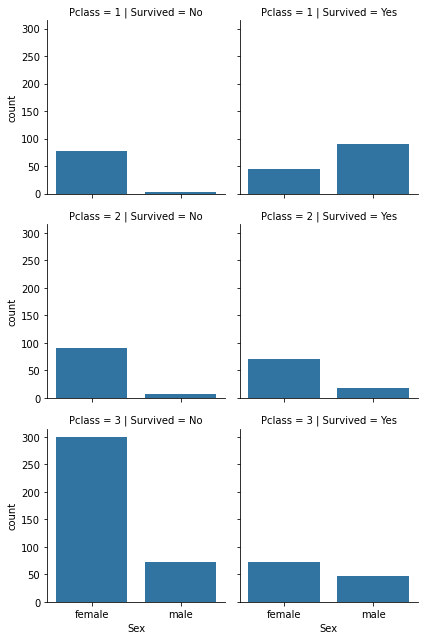

In [58]:
ax = sns.FacetGrid(df,row = 'Pclass', col = 'Survived');
ax.map(sns.countplot, 'Sex');

In [59]:
# Encoding the survived column to numerical type
df['Survived'] = df['Survived'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [60]:
# Splitting the data
x = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 40)

In [61]:
# Modeling 
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

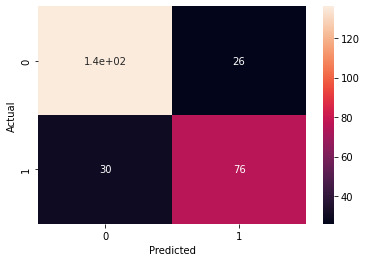

In [62]:
# Model performance
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)

In [63]:
# Printing the model's accuracy, Recall and precision
from sklearn.utils.multiclass import check_classification_targets
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       162
           1       0.75      0.72      0.73       106

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

